# LAB 4 - complex networks FER3 (community edition)

In [43]:
import networkx as nx
import random

%matplotlib inline

## 3.1 Synthetic example analysis (with modularity)

In [44]:
G = nx.barbell_graph(5, 0)

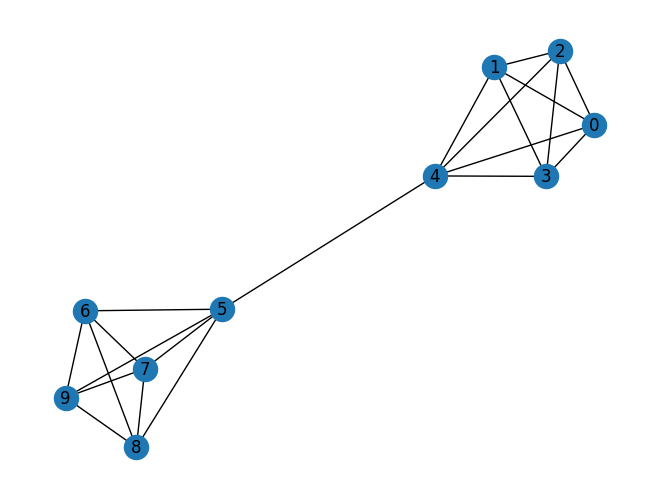

In [45]:
nx.draw(G, with_labels=True)

In [46]:
test_graph = nx.Graph()

In [47]:
nx.add_cycle(test_graph, [0, 1, 2, 3, 4, 5])
nx.add_cycle(test_graph, [6, 7, 8, 9])
nx.add_cycle(test_graph, [10, 11, 12, 13])
nx.add_cycle(test_graph, [14, 15, 16, 17])

In [48]:
test_graph.add_edge(0, 7)
test_graph.add_edge(0, 11)
test_graph.add_edge(0, 14)

In [49]:
test_graph.add_edge(13, 14)

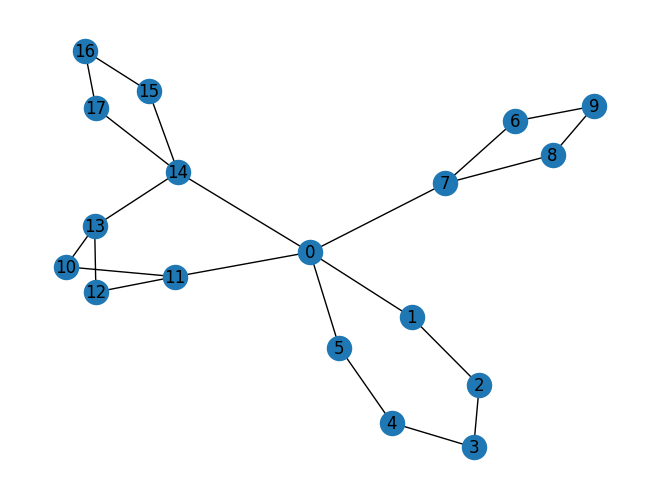

In [50]:
nx.draw(test_graph, with_labels=True)

In [51]:
partition = [{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9}, {10, 11, 12, 13}, {14, 15, 16, 17}]

In [52]:
nx.community.is_partition(test_graph, partition)

True

In [53]:
partition_map = {}
for idx, cluster_nodes in enumerate(partition):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 8: 1,
 9: 1,
 6: 1,
 7: 1,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 16: 3,
 17: 3,
 14: 3,
 15: 3}

In [54]:
partition_map[0] == partition_map[15]

False

In [55]:
partition_map[0] == partition_map[1]

True

In [56]:
node_colors = [partition_map[n] for n in test_graph.nodes]

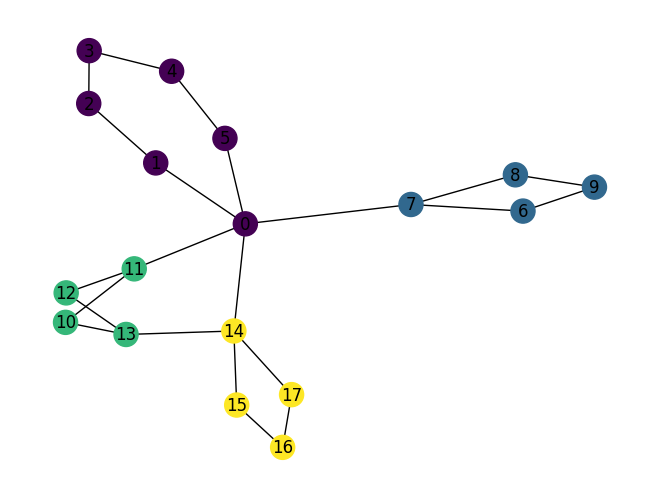

In [57]:
nx.draw(test_graph, node_color=node_colors, with_labels=True)

 goal:  finding a partition that achieves good separation between the groups of nodes
 
 in general: get a partition on some objective function
 
 more in general: get some information using the connections/weights between nodes (distance) -  adjacency matrix

link:https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html

Modularity is the fraction of the edges that fall within the given groups minus the expected fraction if edges were distributed at random. The value of the modularity for unweighted and undirected graphs lies in the range. It is positive if the number of edges within groups exceeds the number expected on the basis of chance. 

In [58]:
partition_example =  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13, 14, 15, 16, 17}]

In [59]:
nx.community.quality.modularity(test_graph, partition_example)

0.4049586776859504

In [60]:
partition_example2 =   [{0, 1, 2}, {3, 4, 5}, {6, 7, 8, 9}, {10, 11, 12, 13}, {14, 15, 16, 17}]

In [61]:
nx.community.quality.modularity(test_graph, partition_example2)

0.5216942148760331

In [62]:
nx.community.quality.modularity(test_graph, partition)

0.5568181818181819

 a random network does not have community structure -  modularity concept introduces a test to analyse fraction of the edges that fall within the given groups minus the expected fraction if edges were distributed at random. 
 
 Analysed at the total network level goal is to maximize modularity score

In [63]:
random_alocation = random.sample(test_graph.nodes, 9)
random_alocation

TypeError: Population must be a sequence.  For dicts or sets, use sorted(d).

In [ ]:
partition_rnd = [set(random_alocation), set(test_graph.nodes) - set(random_alocation)]
partition_rnd

how dose the score look on a random alocation vector - should be close to 0

In [ ]:
nx.community.quality.modularity(test_graph, partition_rnd)

In [ ]:
#visualize 
random_node_color_map = ['red' if n in random_alocation else 'lightblue' for n in test_graph.nodes]
nx.draw(test_graph, node_color=random_node_color_map)

## 3.2 Karate Club example we can not avoid
paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary


wiki: A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972.[2] The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club.

During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.

In [ ]:
karate_graph = nx.karate_club_graph()

In [ ]:
nx.draw(karate_graph, with_labels=True)

In [ ]:
# there are properties
karate_graph.nodes[0]

In [ ]:
karate_graph.nodes[1]

In [ ]:
karate_graph.nodes[2]

In [ ]:
karate_graph.nodes[20]

In [ ]:
#fancy collors 
club_color = {'Mr. Hi': 'gray','Officer': 'red'}
node_colors = [club_color[karate_graph.nodes[n]['club']] for n in karate_graph.nodes]
        
nx.draw(karate_graph, node_color=node_colors, with_labels=True)

In [ ]:
groups = { 'Mr. Hi': set(), 'Officer': set()}

for n in karate_graph.nodes:
    club = karate_graph.nodes[n]['club']
    groups[club].add(n)
    
data_partition = list(groups.values())
data_partition

In [ ]:
nx.community.is_partition(karate_graph, data_partition)

In [ ]:
nx.community.quality.modularity(karate_graph, data_partition)

can we automate the process? Find communities in G using greedy modularity maximization.


paper: Clauset, A., Newman, M. E., & Moore, C. “Finding community structure in very large networks.” Physical Review E 70(6), 2004.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no futher increase in modularity is possible (a maximum). 

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
network_set = greedy_modularity_communities(karate_graph)
network_set

In [ ]:
y = [list(x) for x in network_set]
y

In [ ]:
nx.community.quality.modularity(karate_graph, y)

In [ ]:
partition_map = {}
for idx, cluster_nodes in enumerate(y):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

In [ ]:
node_colors = [partition_map[n] for n in karate_graph.nodes]
nx.draw(karate_graph, node_color=node_colors, with_labels=True)

so the results find a subcommunity in mr. Hi that does not mingle with the 'traitors'. this is the 3rd group

## 3.3. k-clique communities  add-on 

A k-clique community is the union of all cliques of size k that can be reached through adjacent (sharing k-1 nodes) k-cliques.

paper: Gergely Palla, Imre Derényi, Illés Farkas1, and Tamás Vicsek, Uncovering the overlapping community structure of complex networks in nature and society Nature 435, 814-818, 2005, doi:10.1038/nature03607

Clique - subsets of vertices, all adjacent to each other, also called complete subgraphs

In [ ]:
sum(1 for c in nx.find_cliques(karate_graph))  # The number of maximal cliques in Karate graph

In [ ]:
max(nx.find_cliques(karate_graph), key=len)  # The largest maximal clique in Karate graph

In [ ]:
from networkx.algorithms.community import k_clique_communities
c = list(k_clique_communities(karate_graph, 4))
c

what do we get?

## 3.4 Game of Thrones example (with Girvan-Newman clustering)

These networks were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in one of the books in "A Song of Ice and Fire." The edge weight corresponds to the number of interactions.

data at: https://github.com/mathbeveridge/asoiaf

In [ ]:
import pandas as pd
GOT_books = pd.read_csv('C:/Users/demij/asoiaf-all-edges.csv')

In [ ]:
GOT_books.head()

In [ ]:
GOT_graph = nx.Graph()

In [ ]:
for row in GOT_books.iterrows(): GOT_graph.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'])

In [ ]:
list(GOT_graph.edges(data=True))[0]

In [ ]:
list(GOT_graph.edges(data=True))[100]

### Node characteristics

In [ ]:
GOT_graph.number_of_nodes()

In [ ]:
# get that degree stat - fraction of nodes it is connected to
degree_stats = nx.degree_centrality(GOT_graph)

In [ ]:
degree_stats

In [ ]:
# get that degree stat - those most importaint plot characters
sorted(degree_stats.items(), key=lambda x:x[1], reverse=True)[0:10]

In [ ]:
## betweensess centrality
betweenness_centrality_stats = nx.betweenness_centrality(GOT_graph)

In [ ]:
# get that betweenness_centrality - those most importaint plot twisters characters - close to the action
sorted(betweenness_centrality_stats.items(), key=lambda x:x[1], reverse=True)[0:10]

In [ ]:
degree_value = GOT_graph.degree()

In [ ]:
import numpy as np
np.mean([d for _, d in GOT_graph.degree()])

In [ ]:
#lets remove some marginal nodes to go easy on ourselves
remove_val = [node for node,degree in dict(GOT_graph.degree()).items() if degree < 2*7]
remove_val

In [ ]:
GOT_graph.remove_nodes_from(remove_val)

In [ ]:
GOT_graph.number_of_nodes()

In [ ]:
degree_stats2 = nx.degree_centrality(GOT_graph)
degree_stats2

In [ ]:
betweenness_centrality_stats2 = nx.betweenness_centrality(GOT_graph)
betweenness_centrality_stats2

The Girvan-Newman algorithm for the detection and analysis of community structure relies on the iterative elimination of edges that have the highest number of shortest paths between nodes passing through them. By removing edges from the graph one-by-one, the network breaks down into smaller pieces, so-called communities. The algorithm was introduced by Michelle Girvan and Mark Newman.

https://networkx.guide/algorithms/community-detection/girvan-newman/

In [ ]:
nx.draw(GOT_graph, with_labels=True)

so if we remove the connection with the highest betweenness centrality it would be the central one leaving us wih the 2 groups
note that this is an ideal case: groups are fully connected

The Girvan-Newman algorithm can be divided into four main steps:

1. For every edge in a graph, calculate the edge betweenness centrality.
2. Remove the edge with the highest betweenness centrality.
3. Calculate the betweenness centrality for every remaining edge.
4. Repeat steps 2-4 until there are no more edges left.

https://networkx.guide/algorithms/community-detection/girvan-newman/

At the end - Evaluate each partition in the sequence and choose the one with the highest modularity

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# draw the subgraph using the spring layout
pos = nx.spring_layout(GOT_graph)

# color the nodes based on degree centrality
node_colors = [degree_stats2[node] for node in GOT_graph]
nx.draw(GOT_graph, pos, node_color=node_colors, cmap=plt.cm.Reds)

# show the plot
plt.savefig("ref_plot.png",dpi=500)
plt.show()

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman

partition_girvan_newman = girvan_newman(GOT_graph)
list(partition_girvan_newman)

conclusion: central to plots and interactions in those plots

In [ ]:
# k-cluique with a high k
from networkx.algorithms.community import k_clique_communities
c_got = list(k_clique_communities(GOT_graph, 10))
c_got

conclusion - main plot (across all 5 books) and a big side plot (Night's Watch)